## Random forests en Python

A continuación veremos cómo podemos implementar este modelo en Python. Para ello, utilizaremos la librería `scikit-learn`.

### Random forests para clasificación

Para ejemplificar la implementación de un random forest para clasificación utilizaremos el mismo conjunto de datos que para el caso de los árboles de decisión.

#### Paso 1. Lectura del conjunto de datos procesado

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y = True, as_frame = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


El conjunto *train* lo utilizaremos para entrenar el modelo, mientras que con el *test* lo evaluaremos para medir su grado de efectividad. Además, no es necesario que las variables predictoras estén normalizadas, ya que los random forests y, por lo tanto, los árboles de decisión no se ven afectados por la escala de los datos debido a la forma en la que funcionan: toman decisiones basadas en ciertos umbrales de características, independientemente de su escala.

#### Paso 2: Inicialización y entrenamiento del modelo

In [2]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Una vez que el modelo se ha entrenado correctamente, podemos visualizar el random forest con la misma librería. Esta visualización mostrará cada árbol derivado completo:

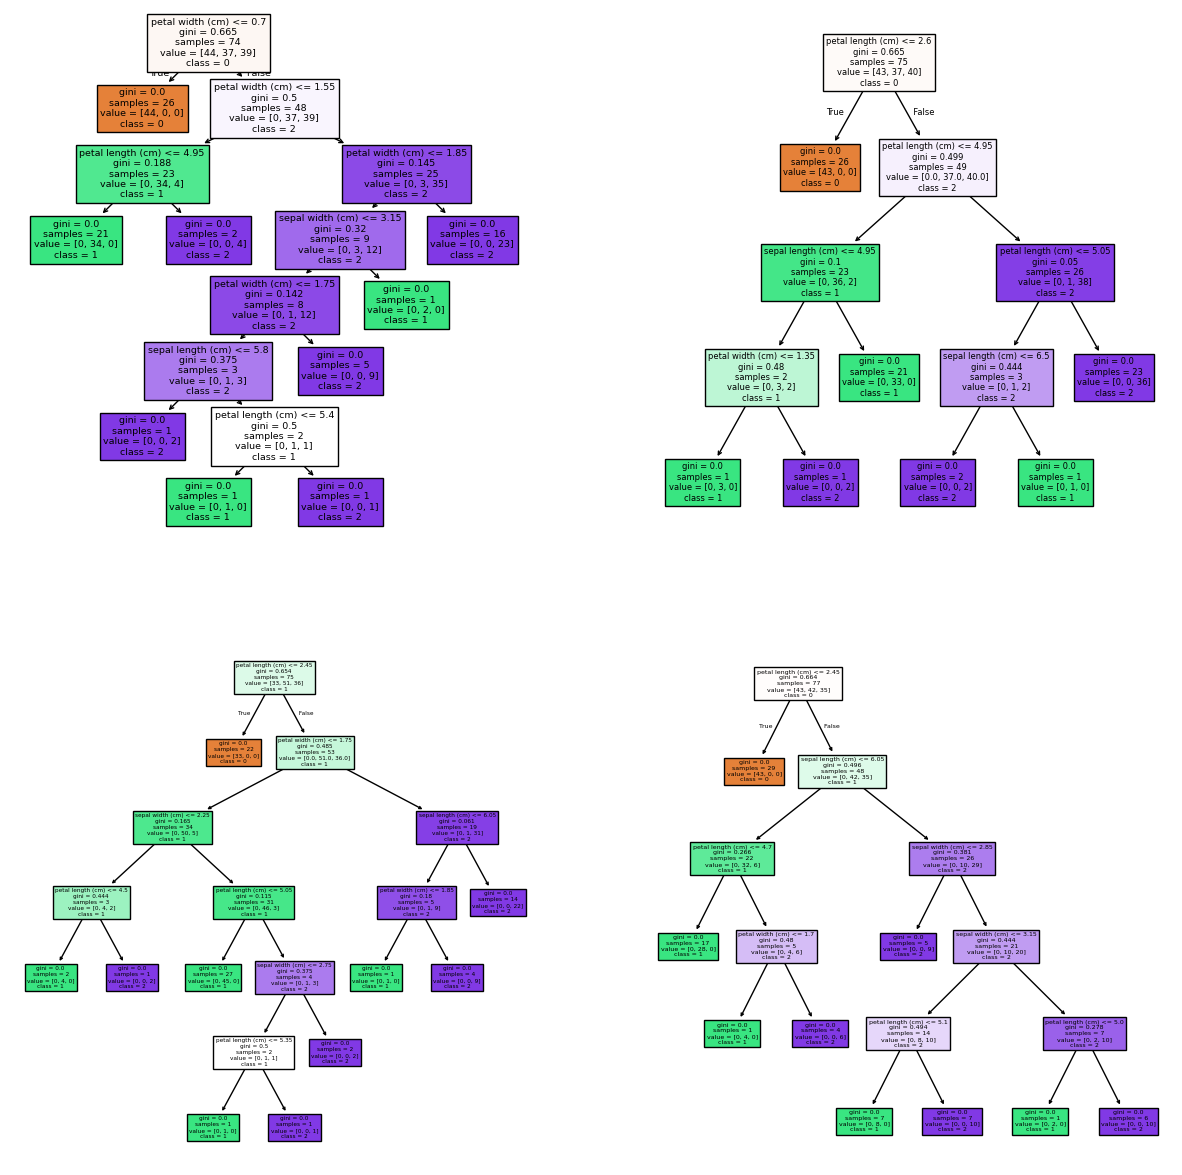

In [3]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

El tiempo de entrenamiento de un modelo dependerá, en primer lugar, del tamaño del conjunto de datos (instancias y características), y también de la cantidad de árboles que queramos que tenga nuestro random forest.

#### Paso 3: Predicción del modelo

Una vez se ha entrenado el modelo, se puede utilizar para predecir con el conjunto de datos de prueba.

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

Con los datos en crudo es muy complicado saber si el modelo está acertando o no. Para ello, debemos compararlo con la realidad. Existe una gran cantidad de métricas para medir la efectividad de un modelo a la hora de predecir, entre ellas la **precisión** (*accuracy*), que es la fracción de predicciones que el modelo realizó correctamente.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

¡El modelo es perfecto!

#### Paso 4: Guardado del modelo

Una vez tenemos el modelo que estábamos buscando (presumiblemente tras la optimización de hiperparámetros), para poder utilizarlo a futuro es necesario almacenarlo en nuestro directorio, junto a la semilla.

In [4]:
from pickle import dump

dump(model, open("random_forest_classifier_default_42.sav", "wb"))

Añadir un nombre explicativo al modelo es vital, ya que en el caso de perder el código que lo ha generado sabremos, por un lado, qué configuración tiene (en este caso ponemos `default` porque no hemos personalizado ninguno de los hiperparámetros del modelo, hemos dejado los que tiene por defecto la función) y además la semilla para replicar los componentes aleatorios del modelo, que en este caso lo hacemos añadiendo un número al nombre del archivo, el `42`.

### Random forest para regresión

Para ejemplificar la implementación de un random forest para regresión utilizaremos el mismo conjunto de datos que para el caso de los árboles de decisión.

#### Paso 1. Lectura del conjunto de datos procesado

In [5]:
import pandas as pd

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_petrol_consumption_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_petrol_consumption_test.csv")

train_data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,8.0,4447,8577,0.529,464
1,7.5,4870,2351,0.529,414
2,8.0,5319,11868,0.451,344
3,7.0,4345,3905,0.672,968
4,7.5,3357,4121,0.547,628


In [ ]:
X_train = train_data.drop(["Petrol_Consumption"], axis = 1)
y_train = train_data["Petrol_Consumption"]
X_test = test_data.drop(["Petrol_Consumption"], axis = 1)
y_test = test_data["Petrol_Consumption"]

El conjunto *train* lo utilizaremos para entrenar el modelo, mientras que con el *test* lo evaluaremos para medir su grado de efectividad. Además, no es necesario que las variables predictoras estén normalizadas, ya que los random forests y, por lo tanto, los árboles de decisión no se ven afectados por la escala de los datos debido a la forma en la que funcionan: toman decisiones basadas en ciertos umbrales de características, independientemente de su escala.

#### Paso 2: Inicialización y entrenamiento del modelo

In [6]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Paso 3: Predicción del modelo

Una vez se ha entrenado el modelo, se puede utilizar para predecir con el conjunto de datos de prueba.

In [7]:
y_pred = model.predict(X_test)
y_pred

array([1.  , 0.  , 2.  , 1.  , 1.16, 0.  , 1.  , 1.98, 1.09, 1.  , 1.98,
       0.  , 0.  , 0.  , 0.  , 1.02, 2.  , 1.  , 1.  , 2.  , 0.  , 1.92,
       0.  , 2.  , 2.  , 1.99, 1.99, 2.  , 0.  , 0.  ])

Para calcular la efectividad del modelo utilizaremos el **error cuadrático medio** (*MSE*):

In [8]:
from sklearn.metrics import mean_squared_error

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")

Error cuadrático medio: 0.0013833333333333336


#### Paso 4: Guardado del modelo

Una vez tenemos el modelo que estábamos buscando (presumiblemente tras la optimización de hiperparámetros), para poder utilizarlo a futuro es necesario almacenarlo en nuestro directorio, junto a la semilla.

In [9]:
dump(model, open("random_forest_regressor_default_42.sav", "wb"))

Añadir un nombre explicativo al modelo es vital, ya que en el caso de perder el código que lo ha generado sabremos, por un lado, qué configuración tiene (en este caso ponemos `default` porque no hemos personalizado ninguno de los hiperparámetros del modelo, hemos dejado los que tiene por defecto la función) y además la semilla para replicar los componentes aleatorios del modelo, que en este caso lo hacemos añadiendo un número al nombre del archivo, el `42`.